In [1]:
import pandas as pd
import numpy as np
import tables as tb
import os
import matplotlib.pyplot as plt
from mpl_interactions import ioff, panhandler, zoom_factory
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
import sys
from datetime import datetime

In [2]:
file = "../data/analysis/Run_13850_Filtered.h5"
file = "../data/analysis/Run_13850_FilteredRaw.h5"
file = "../data/analysis/Run_14180_FilteredRaw.h5"

data = pd.read_hdf(file, "data")
data_properties = pd.read_hdf(file, "data_properties")

display(data)

display(data_properties)
print(len(data_properties.event.unique()))

,event,ts_raw,pmt,pe_int,peak_time,noise_thr,ts
0,27795,1.723015e+09,0,54.464,1357.500,3.278715,2024-08-07 02:12:56.864
1,27795,1.723015e+09,0,54.464,1366.175,3.278715,2024-08-07 02:12:56.864
2,27795,1.723015e+09,0,29.464,1412.925,3.278715,2024-08-07 02:12:56.864
3,27795,1.723015e+09,0,46.464,1467.725,3.278715,2024-08-07 02:12:56.864
4,27795,1.723015e+09,0,47.464,1492.400,3.278715,2024-08-07 02:12:56.864
...,...,...,...,...,...,...,...
24623,17010,1.723014e+09,59,51.432,1496.200,3.664538,2024-08-07 02:03:22.813
24624,17010,1.723014e+09,59,39.432,1530.075,3.664538,2024-08-07 02:03:22.813
24625,17010,1.723014e+09,59,19.432,1558.600,3.664538,2024-08-07 02:03:22.813
24626,17010,1.723014e+09,59,38.432,1578.100,3.664538,2024-08-07 02:03:22.813


,event,S2_area,cath_area,ts_raw,deltaT,sigma,S2_amp,ts
0,27795,5.477356e+06,13422.032,1.723015e+09,146.375,3.259948,17649.778,2024-08-07 02:12:56.864
1,27809,9.352033e+06,24009.712,1.723015e+09,0.000,5.605103,17814.182,2024-08-07 02:12:57.428
2,27837,6.741397e+06,22395.992,1.723015e+09,0.000,5.369032,13399.411,2024-08-07 02:12:58.799
3,27844,1.086323e+07,34701.144,1.723015e+09,0.000,5.578388,21236.038,2024-08-07 02:12:59.174
4,27851,6.458657e+06,16853.408,1.723015e+09,804.575,5.600546,12359.735,2024-08-07 02:12:59.492
...,...,...,...,...,...,...,...,...
42,16961,8.746126e+06,26420.296,1.723014e+09,485.475,4.848544,19849.246,2024-08-07 02:03:19.939
43,16968,9.694784e+06,26177.024,1.723014e+09,53.750,2.610765,35958.332,2024-08-07 02:03:20.355
44,16975,6.576611e+06,17105.344,1.723014e+09,0.000,2.926860,23173.455,2024-08-07 02:03:20.883
45,16989,7.975938e+06,20595.736,1.723014e+09,383.925,4.205081,19986.253,2024-08-07 02:03:21.857


33045


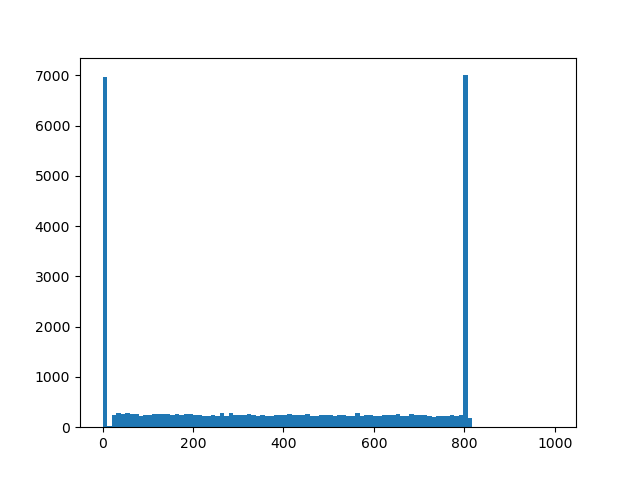

In [3]:
%matplotlib widget
plt.figure()

plt.hist(data_properties.deltaT, bins = 100);

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_5532/1151163147.py:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color='white')  # Set masked values (zeros) to white


Text(0, 0.5, 'Cathode PE Area [ADC]')

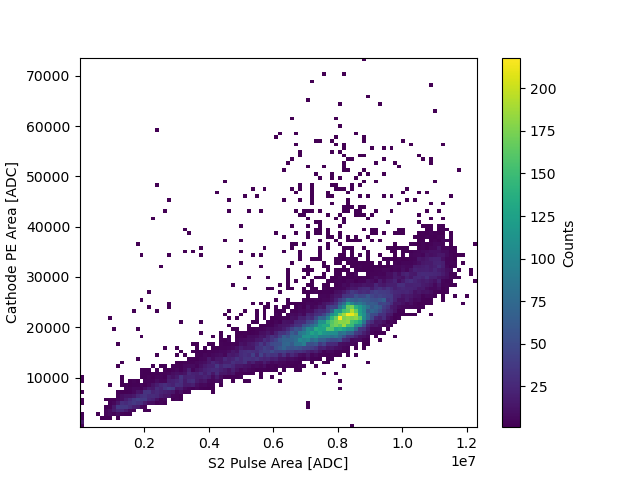

In [4]:

# 1. Create the 2D histogram

data_properties_active = data_properties[ (data_properties.deltaT>0) & (data_properties.deltaT<794)]

# hist, xedges, yedges = np.histogram2d(data_properties_active.S2_area, data_properties_active.cath_area, bins=100)
hist, xedges, yedges = np.histogram2d(data_properties.S2_area, data_properties.cath_area, bins=100)

# 2. Mask zero bins
masked_hist = np.ma.masked_where(hist == 0, hist)  # Mask bins where the count is zero

# 3. Create a custom colormap with white for the masked values (zero bins)
cmap = plt.cm.viridis  # Choose a colormap you like
cmap.set_bad(color='white')  # Set masked values (zeros) to white

# 4. Plot the 2D histogram
fig, ax = plt.subplots()
pcm = ax.pcolormesh(xedges, yedges, masked_hist.T, cmap=cmap)

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

plt.xlabel("S2 Pulse Area [ADC]")
plt.ylabel("Cathode PE Area [ADC]")


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_5532/1528328168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_properties_active['sigma'] = data_properties_active['sigma'].fillna(0)
/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_5532/1528328168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_properties_active['S2_amp'] = data_properties_active['S2_amp'].fillna(-1)
/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_5532/1528328168.py:16: MatplotlibDeprecation

Text(0, 0.5, 'Amp. Norm. Peak Width [mus]')

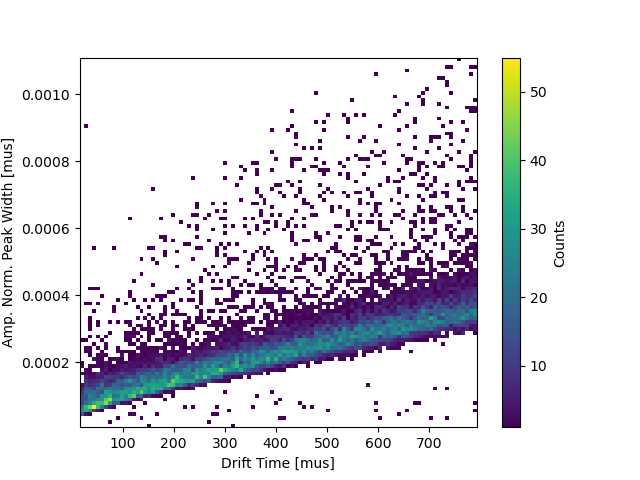

In [5]:
# Make a plot of the time vs peak width

data_properties_active['sigma'] = data_properties_active['sigma'].fillna(0)
data_properties_active['S2_amp'] = data_properties_active['S2_amp'].fillna(-1)

data_properties_active = data_properties_active[data_properties_active.S2_amp > 0]

# hist, xedges, yedges = np.histogram2d(data_properties_active.S2_area, data_properties_active.cath_area, bins=100)
hist, xedges, yedges = np.histogram2d(data_properties_active.deltaT, data_properties_active.sigma/data_properties_active.S2_amp, bins=100)

# 2. Mask zero bins
masked_hist = np.ma.masked_where(hist == 0, hist)  # Mask bins where the count is zero

# 3. Create a custom colormap with white for the masked values (zero bins)
cmap = plt.cm.viridis  # Choose a colormap you like
cmap.set_bad(color='white')  # Set masked values (zeros) to white

# 4. Plot the 2D histogram
fig, ax = plt.subplots()
pcm = ax.pcolormesh(xedges, yedges, masked_hist.T, cmap=cmap)

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

plt.xlabel("Drift Time [mus]")
plt.ylabel("Amp. Norm. Peak Width [mus]")

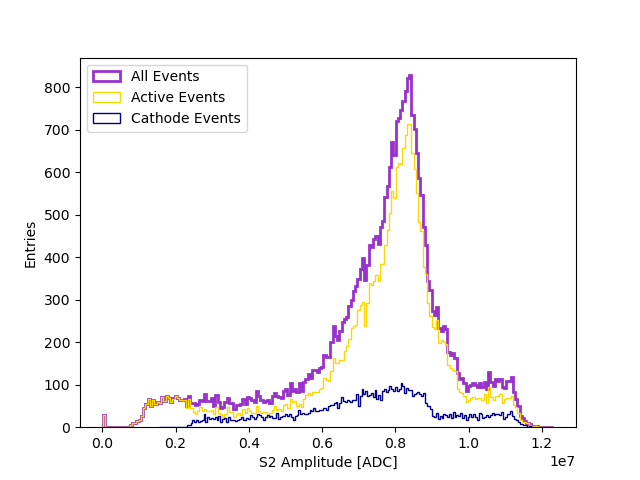

In [6]:
# Histogram the S2 energy
plt.figure()

plt.hist(data_properties.S2_area, bins = 200, histtype = "step", color = "darkorchid", linewidth=2, label = "All Events");
plt.xlabel("S2 Amplitude [ADC]")
plt.ylabel("Entries")

# plt.hist(data_properties_active[data_properties_active.cath_area < 50e3].S2_area, bins = 200, histtype = "step");
plt.hist(data_properties[(data_properties.deltaT<794)].S2_area, bins = 200, histtype = "step", label="Active Events", color="gold");
plt.hist(data_properties[(data_properties.deltaT>794)].S2_area, bins = 200, histtype = "step", label="Cathode Events", color="DarkBlue");
plt.legend(loc="upper left")

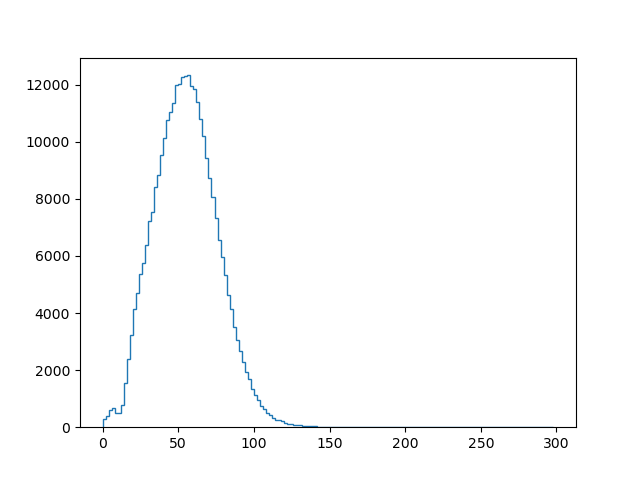

In [7]:
plt.figure()

plt.hist(data[data.pmt == 4].pe_int, bins = np.arange(0, 300, 2), histtype = "step");
# plt.semilogy()

In [8]:
data_grouped = data.groupby(['event', 'peak_time'])['pe_int'].sum().reset_index()
display(data_grouped)

,event,peak_time,pe_int
0,1,1350.225,41.832
1,1,1351.375,52.232
2,1,1351.650,50.424
3,1,1351.800,50.680
4,1,1351.850,25.792
...,...,...,...
17290623,52145,1758.925,-6.152
17290624,52145,1759.075,-0.536
17290625,52145,1759.200,-1.552
17290626,52145,1759.325,-0.296


KeyboardInterrupt: 

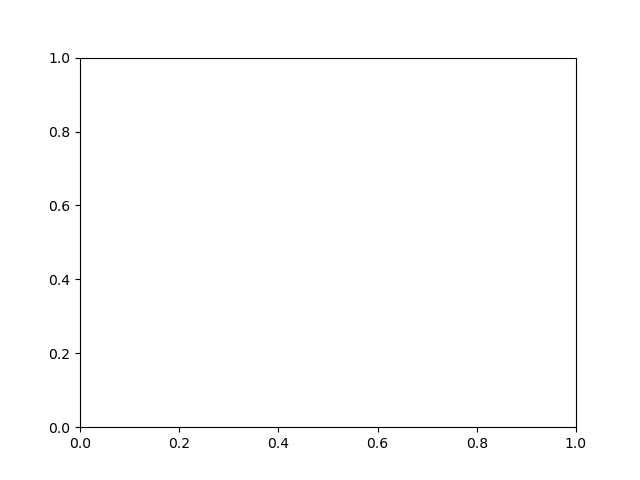

In [9]:
fig, ax = plt.subplots()

bins = np.arange(1350, 1770,10 )
bin_centers = (bins[:-1] + bins[1:]) / 2

total_hist = None

for index, evt in enumerate(data_grouped.event.unique()):

    if index % 1000 == 0:
        print(f"Event: {index}")

    # if index > 5000:
    #     break

    S2_pulse = data_properties[data_properties['event'] == evt]

    counts, edges =np.histogram(data_grouped[data_grouped.event == evt].peak_time, weights=data_grouped[data_grouped.event == evt].pe_int, bins = bins )
    

    # hist2D, xedges, yedges = np.histogram2d(bin_centers, counts, bins=[bins, np.arange(0,4000, 25)])
    hist2D, xedges, yedges = np.histogram2d(bin_centers, counts/S2_pulse.S2_area.item(), bins=[bins, np.linspace(0,0.0005, 50)])
    
    # masked_hist=hist2D

    if total_hist is None:
        total_hist = hist2D
    else:
        total_hist += hist2D

    # print(total_hist[total_hist >0])

# 2. Mask zero bins
total_hist = np.ma.masked_where(total_hist == 0, total_hist)  # Mask bins where the count is zero

# 3. Create a custom colormap with white for the masked values (zero bins)
cmap = plt.cm.viridis  # Choose a colormap you like
cmap.set_bad(color='white')  # Set masked values (zeros) to white

# 4. Plot the 2D histogram

pcm = ax.pcolormesh(xedges, yedges, total_hist.T, cmap=cmap)

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

plt.xlabel("Time [mus]")
plt.ylabel("Amplitude [ADC]")
